In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

In [5]:
data = pd.read_csv('fifa19.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null 

In [7]:
data.describe()

ID           Age       Overall     Potential       Special  \
count   18207.000000  18207.000000  18207.000000  18207.000000  18207.000000   
mean   214298.338606     25.122206     66.238699     71.307299   1597.809908   
std     29965.244204      4.669943      6.908930      6.136496    272.586016   
min        16.000000     16.000000     46.000000     48.000000    731.000000   
25%    200315.500000     21.000000     62.000000     67.000000   1457.000000   
50%    221759.000000     25.000000     66.000000     71.000000   1635.000000   
75%    236529.500000     28.000000     71.000000     75.000000   1787.000000   
max    246620.000000     45.000000     94.000000     95.000000   2346.000000   

       International Reputation     Weak Foot   Skill Moves  Jersey Number  \
count              18159.000000  18159.000000  18159.000000   18147.000000   
mean                   1.113222      2.947299      2.361308      19.546096   
std                    0.394031      0.660456      0.756164      15.947765   
min                    1.000000      1.000000      1.000000       1.000000   
25%                    1.000000      3.000000      2.000000       8.000000   
50%                    1.000000      3.000000      2.000000      17.000000   
75%                    1.000000      3.000000      3.000000      26.000000   
max                    5.000000      5.000000      5.000000      99.000000   

           Crossing      ...          Penalties     Composure       Marking  \
count  18159.000000      ...       18159.000000  18159.000000  18159.000000   
mean      49.734181      ...          48.548598     58.648274     47.281623   
std       18.364524      ...          15.704053     11.436133     19.904397   
min        5.000000      ...           5.000000      3.000000      3.000000   
25%       38.000000      ...          39.000000     51.000000     30.000000   
50%       54.000000      ...          49.000000     60.000000     53.000000   
75%       64.000000      ...          60.000000     67.000000     64.000000   
max       93.000000      ...          92.000000     96.000000     94.000000   

       StandingTackle  SlidingTackle      GKDiving    GKHandling  \
count    18159.000000   18159.000000  18159.000000  18159.000000   
mean        47.697836      45.661435     16.616223     16.391596   
std         21.664004      21.289135     17.695349     16.906900   
min          2.000000       3.000000      1.000000      1.000000   
25%         27.000000      24.000000      8.000000      8.000000   
50%         55.000000      52.000000     11.000000     11.000000   
75%         66.000000      64.000000     14.000000     14.000000   
max         93.000000      91.000000     90.000000     92.000000   

          GKKicking  GKPositioning    GKReflexes  
count  18159.000000   18159.000000  18159.000000  
mean      16.232061      16.388898     16.710887  
std       16.502864      17.034669     17.955119  
min        1.000000       1.000000      1.000000  
25%        8.000000       8.000000      8.000000  
50%       11.000000      11.000000     11.000000  
75%       14.000000      14.000000     14.000000  
max       91.000000      90.000000     94.000000  

[8 rows x 43 columns]

In [8]:
import matplotlib.pyplot as plt

In [9]:
data.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS            

In [10]:
# filling the missing value for the continous variables for proper data visualization

data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€200K', inplace = True)

In [11]:
data.isnull().sum()

ID                             0
Name                           0
Age                            0
Photo                          0
Nationality                    0
Flag                           0
Overall                        0
Potential                      0
Club                           0
Club Logo                      0
Value                          0
Wage                           0
Special                        0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Body Type                      0
Real Face                     48
Position                       0
Jersey Number                  0
Joined                         0
Loaned From                    0
Contract Valid Until           0
Height                         0
Weight                         0
LS                          2085
ST                          2085
RS                          2085
          

In [12]:
data.fillna(0, inplace = True)

In [13]:
data.isnull().sum()

ID                          0
Name                        0
Age                         0
Photo                       0
Nationality                 0
Flag                        0
Overall                     0
Potential                   0
Club                        0
Club Logo                   0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Real Face                   0
Position                    0
Jersey Number               0
Joined                      0
Loaned From                 0
Contract Valid Until        0
Height                      0
Weight                      0
LS                          0
ST                          0
RS                          0
                           ..
Dribbling                   0
Curve                       0
FKAccuracy

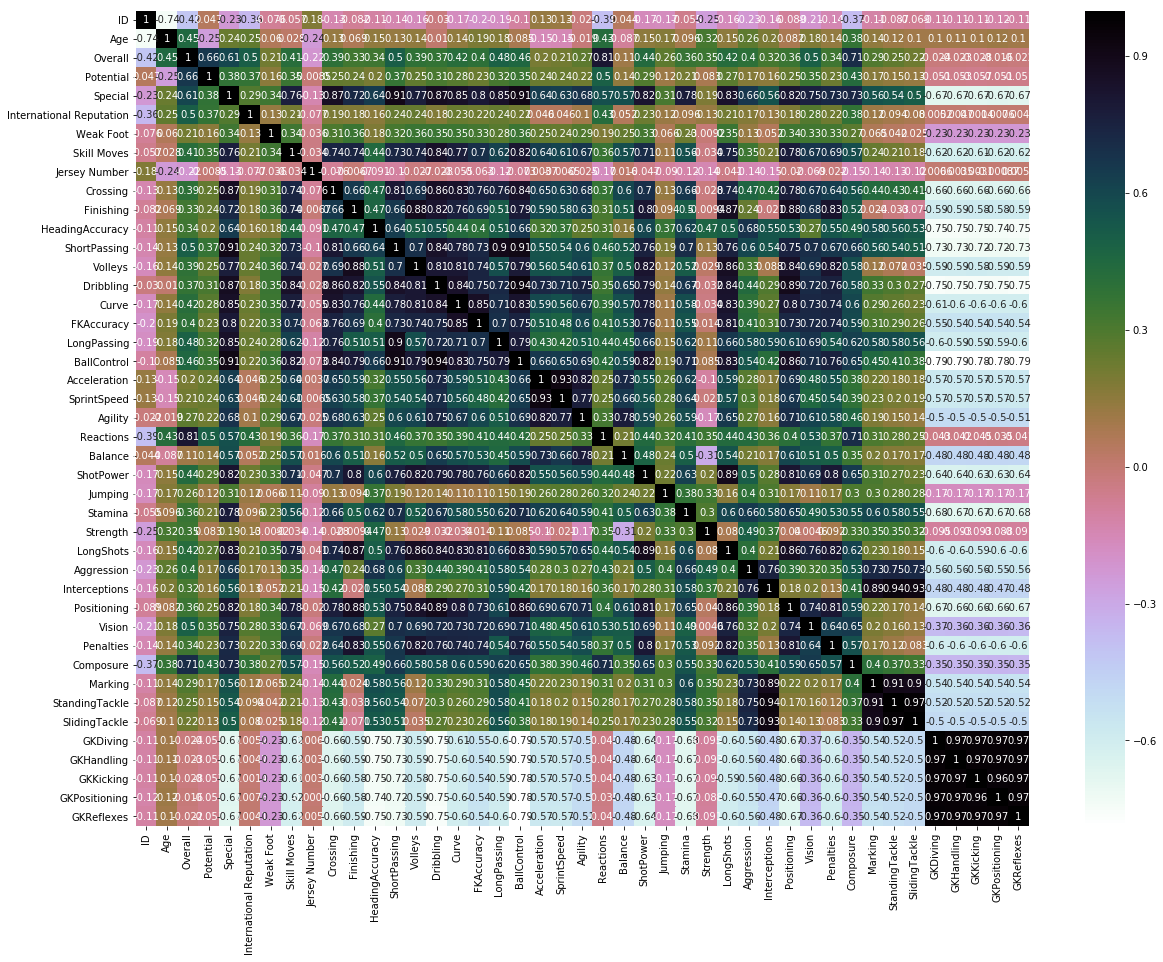

In [16]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot = True, cmap='cubehelix_r')
plt.show()

In [19]:
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club_Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

Text(0.5, 1.0, 'Most Preferred Foot of the Players')

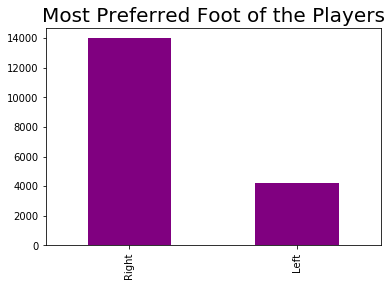

In [20]:
data['Preferred Foot'].value_counts().plot.bar(color = 'purple')
plt.title('Most Preferred Foot of the Players', fontsize = 20)

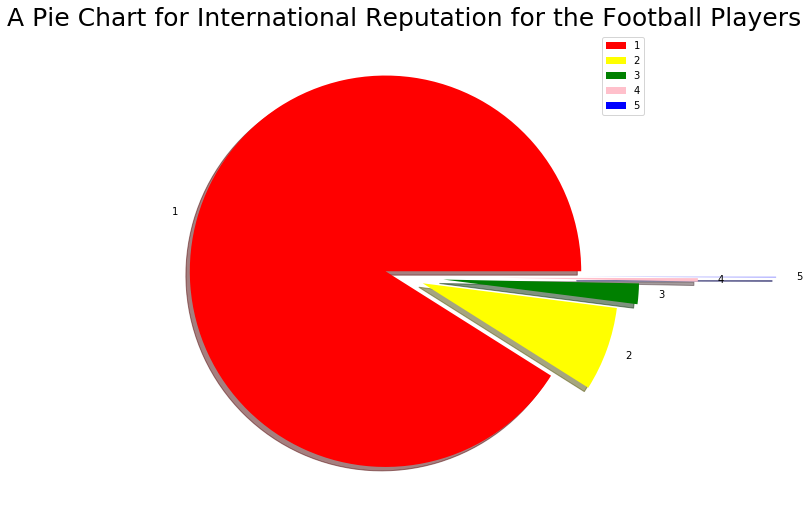

In [22]:
data['International Reputation'].value_counts()
labels = ['1', '2', '3', '4', '5']
sizes = [16532, 1261, 309, 51, 6]
colors = ['red', 'yellow', 'green', 'pink', 'blue']
explode = [0.1, 0.1, 0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('A Pie Chart for International Reputation for the Football Players', fontsize = 25)
plt.legend()
plt.show()

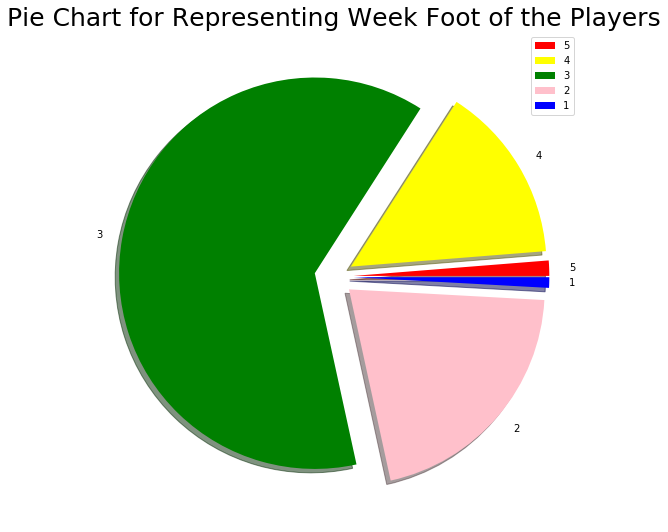

In [23]:
labels = ['5', '4', '3', '2', '1'] 
size = [229, 2662, 11349, 3761, 158]
colors = ['red', 'yellow', 'green', 'pink', 'blue']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('Pie Chart for Representing Week Foot of the Players', fontsize = 25)
plt.legend()
plt.show()

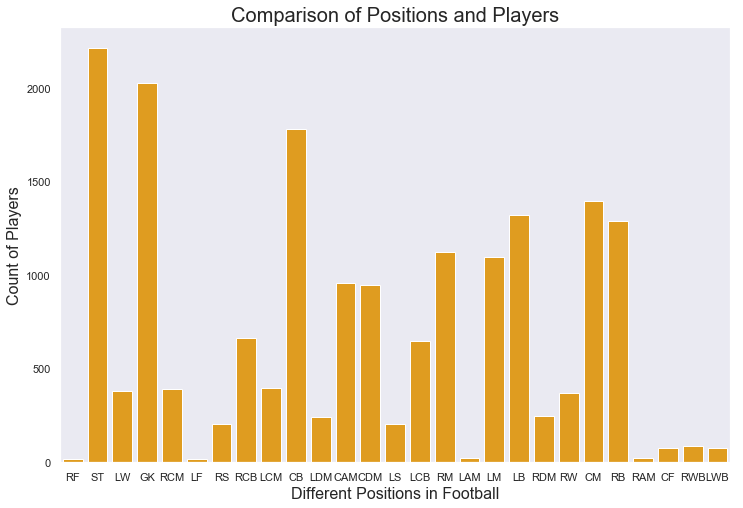

In [24]:
plt.figure(figsize = (12, 8))
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
ax = sns.countplot('Position', data = data, color = 'orange')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

In [25]:
# defining a function for cleaning the Weight data

def extract_value_from(value):
    out = value.replace('lbs', '')
    return float(out)

# applying the function to weight column
#data['value'] = data['value'].apply(lambda x: extract_value_from(x))
data['Weight'] = data['Weight'].apply(lambda x : extract_value_from(x))

data['Weight'].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

In [26]:
# defining a function for cleaning the wage column

def extract_value_from(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)

In [27]:
# applying the function to the wage column

data['Value'] = data['Value'].apply(lambda x: extract_value_from(x))
data['Wage'] = data['Wage'].apply(lambda x: extract_value_from(x))

data['Wage'].head()

0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: float64

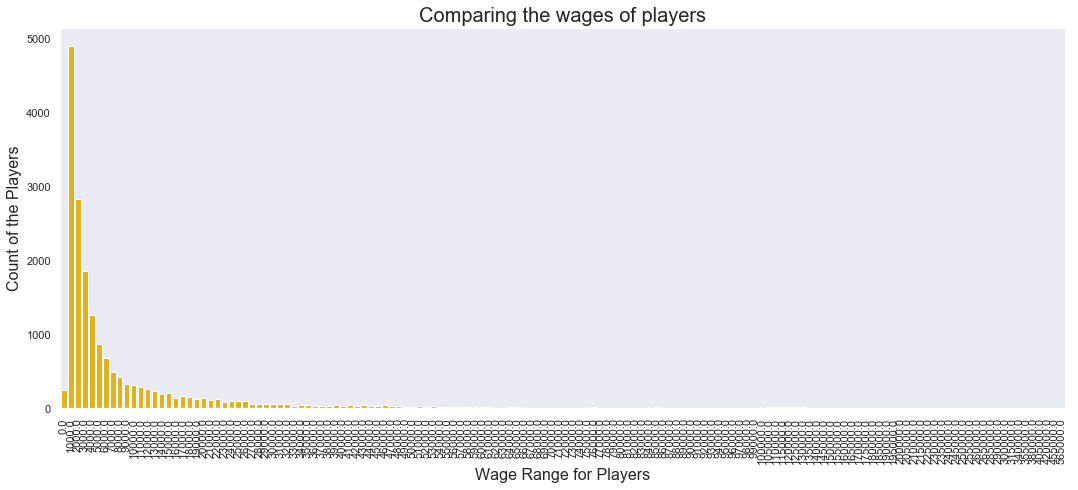

In [28]:
# Comparing the players' Wages

sns.set(style = 'dark', palette = 'bright', color_codes = True)
x = data.Wage
plt.rcParams['figure.figsize'] = (18, 7)
sns.countplot(x, data = data, color = 'y')
plt.xlabel('Wage Range for Players', fontsize = 16)
plt.ylabel('Count of the Players', fontsize = 16)
plt.title('Comparing the wages of players', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

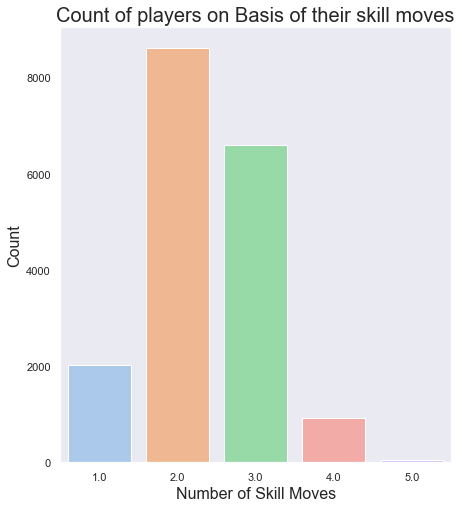

In [29]:
# Skill Moves of Players

plt.figure(figsize = (7, 8))
ax = sns.countplot(x = 'Skill Moves', data = data, palette = 'pastel')
ax.set_title(label = 'Count of players on Basis of their skill moves', fontsize = 20)
ax.set_xlabel(xlabel = 'Number of Skill Moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()


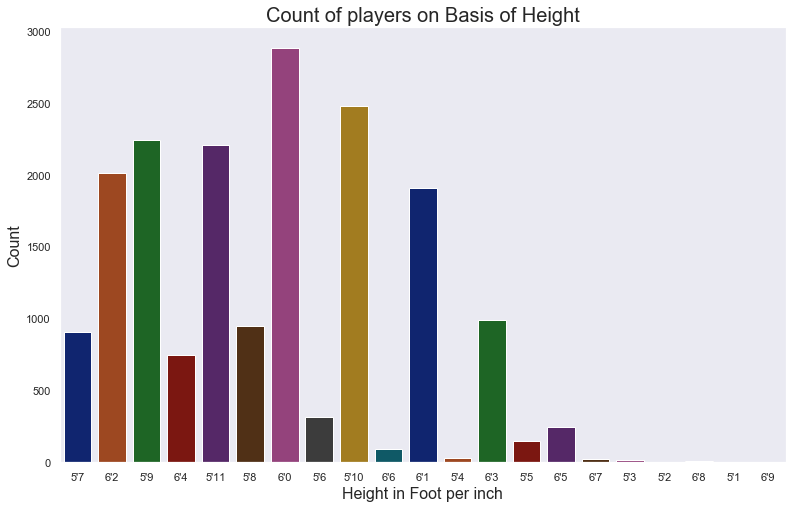

In [30]:
# Height of Players

plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'Height', data = data, palette = 'dark')
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

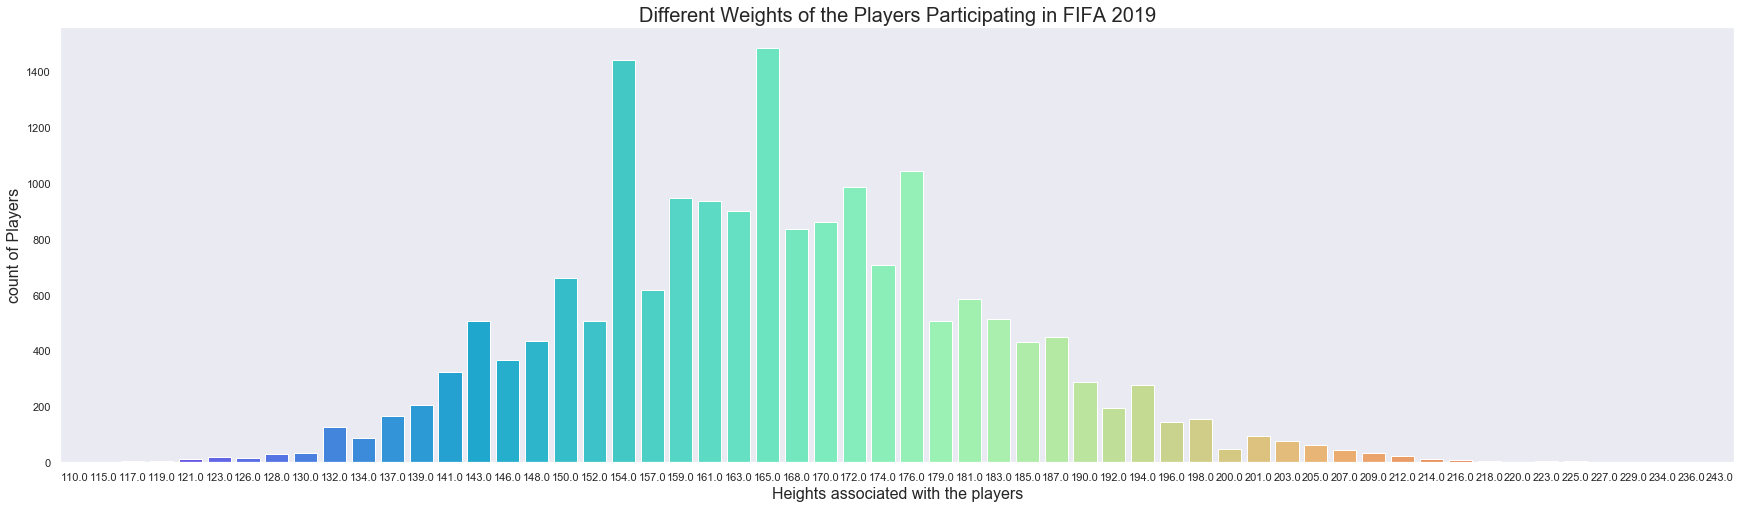

In [31]:
# To show Different body weight of the players participating in the FIFA 2019

plt.figure(figsize = (30, 8))
sns.countplot(x = 'Weight', data = data, palette = 'rainbow')
plt.title('Different Weights of the Players Participating in FIFA 2019', fontsize = 20)
plt.xlabel('Heights associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

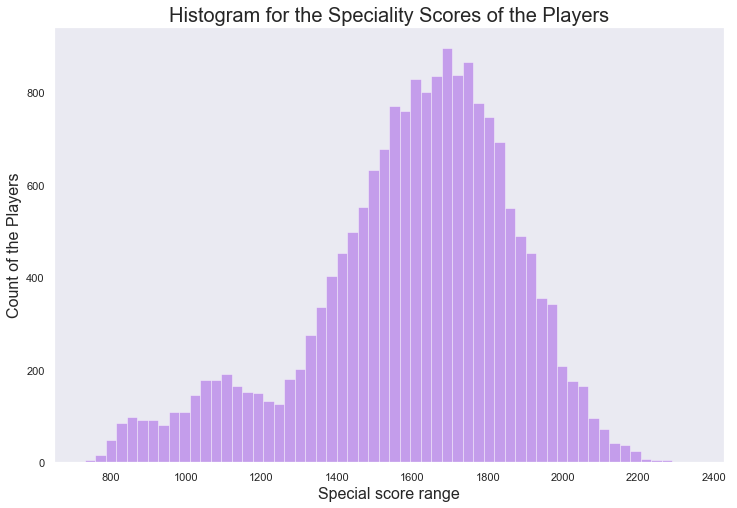

In [32]:
# To show Different Speciality Score of the players participating in the FIFA 2019

x = data.Special
plt.figure(figsize = (12, 8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'm')
ax.set_xlabel(xlabel = 'Special score range', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of the Players',fontsize = 16)
ax.set_title(label = 'Histogram for the Speciality Scores of the Players', fontsize = 20)
plt.show()

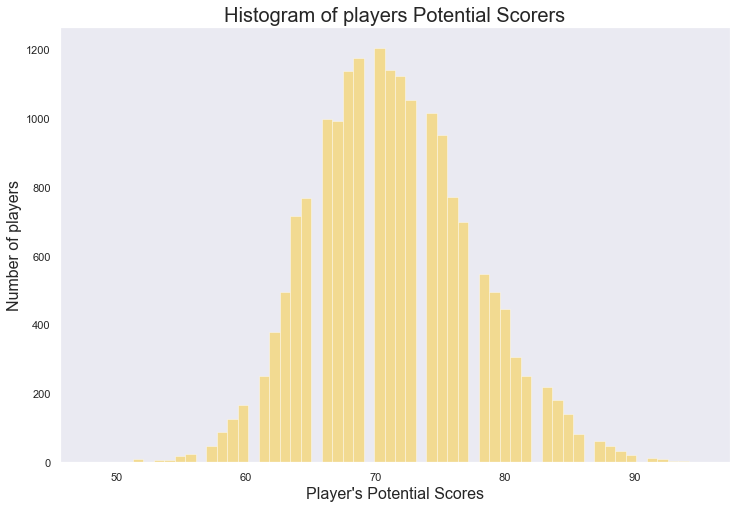

In [33]:
# To show Different potential scores of the players participating in the FIFA 2019

x = data.Potential
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player\'s Potential Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players Potential Scorers', fontsize = 20)
plt.show()

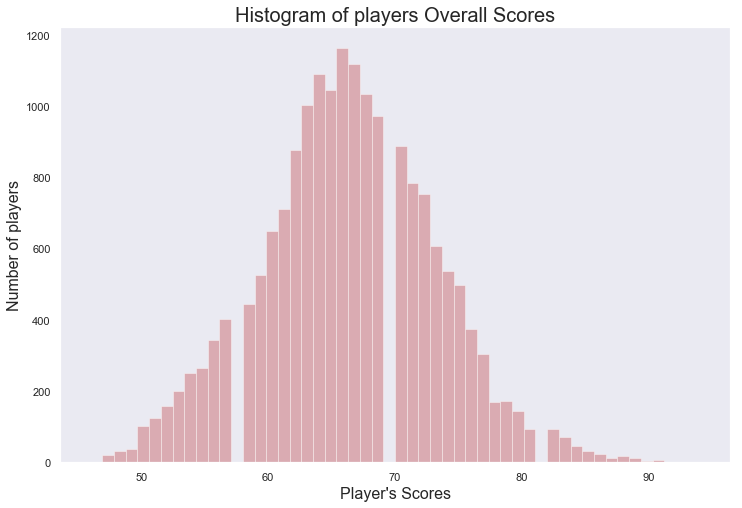

In [34]:
# To show Different overall scores of the players participating in the FIFA 2019

sns.set(style = "dark", palette = "deep", color_codes = True)
x = data.Overall
plt.figure(figsize = (12,8))
ax = sns.distplot(x, bins = 52, kde = False, color = 'r')
ax.set_xlabel(xlabel = "Player\'s Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players Overall Scores', fontsize = 20)
plt.show()

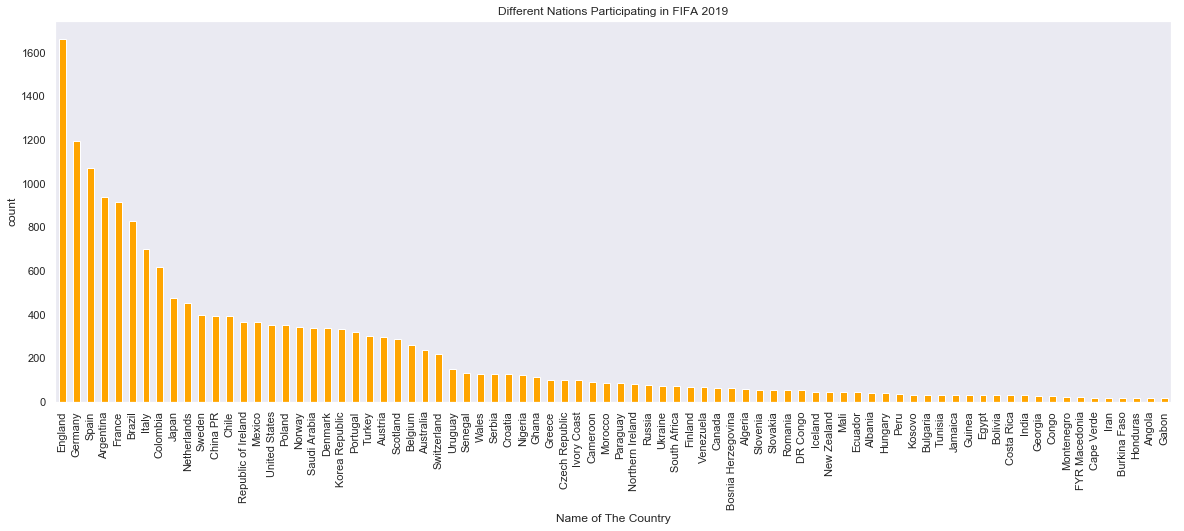

In [35]:
# To show Different nations participating in the FIFA 2019

data['Nationality'].value_counts().head(80).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Different Nations Participating in FIFA 2019')
plt.xlabel('Name of The Country')
plt.ylabel('count')
plt.show()

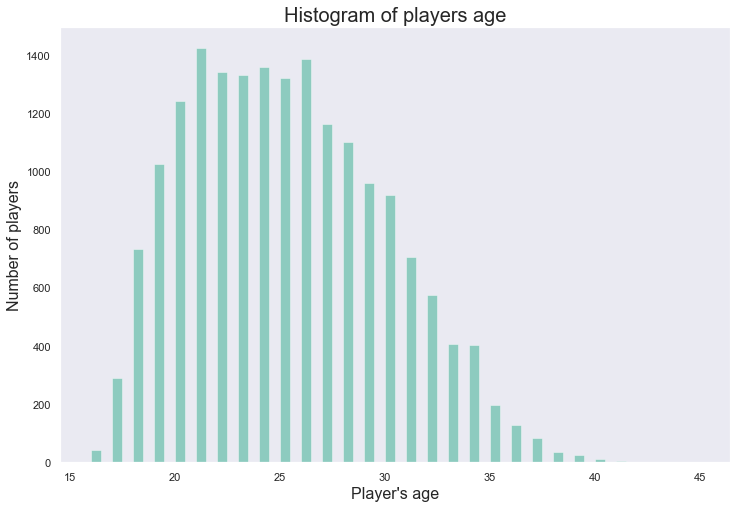

In [36]:
# To show that there are people having same age
# Histogram: number of players's age

sns.set(style = "dark", palette = "colorblind", color_codes = True)
x = data.Age
plt.figure(figsize = (12,8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'g')
ax.set_xlabel(xlabel = "Player\'s age", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players age', fontsize = 20)
plt.show()

In [37]:
# selecting some of the interesting and important columns from the set of columns in the given dataset

selected_columns = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']

data_selected = pd.DataFrame(data, columns = selected_columns)
data_selected.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Height', 'Weight', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Comparison of Overall Scores and age wrt Preferred foot')

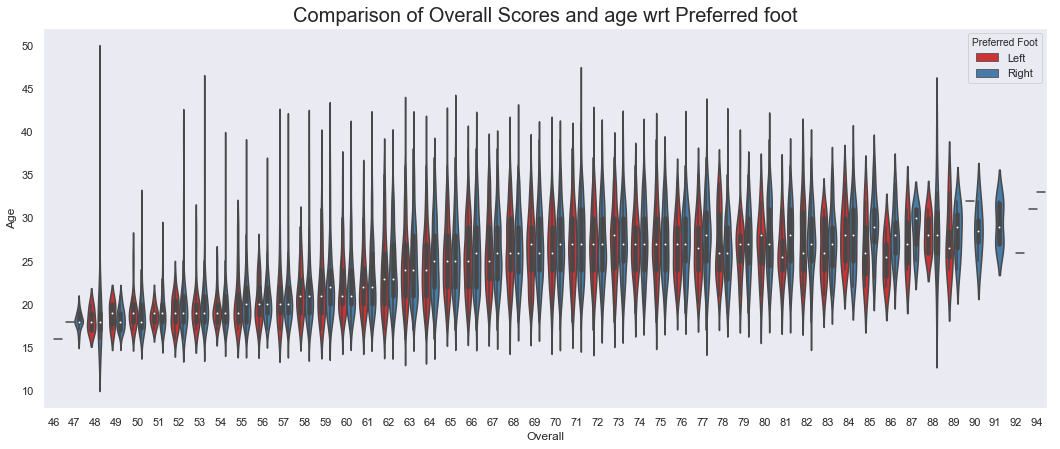

In [38]:
# violin plot 

plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(data['Overall'], data['Age'], hue = data['Preferred Foot'], palette = 'Set1')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 20)

In [39]:
# having a look at the sample of selected data

data_selected.sample(5)

Name  Age    Nationality  Overall  Potential             Club  \
13600  W. Pawłowski   25         Poland       62         65    Górnik Zabrze   
15477    Li Benjian   32       China PR       59         59  Henan Jianye FC   
7685   Mamadu Candé   26  Guinea Bissau       67         67      Santa Clara   
3679      C. Galano   27          Italy       72         72           Foggia   
3999       S. Gashi   29        Albania       71         71  Colorado Rapids   

           Value     Wage  Special Preferred Foot       ...        Composure  \
13600   270000.0   1000.0      937          Right       ...             58.0   
15477   120000.0   2000.0     1631           Left       ...             60.0   
7685    650000.0   2000.0     1740           Left       ...             62.0   
3679   3300000.0  30000.0     1805           Left       ...             65.0   
3999   2400000.0   7000.0     1959           Left       ...             66.0   

       Marking  StandingTackle SlidingTackle GKDiving GKHandling GKKicking  \
13600     18.0            10.0          14.0     62.0       60.0      50.0   
15477     60.0            52.0          47.0     14.0       13.0      15.0   
7685      63.0            68.0          63.0     10.0       16.0      10.0   
3679      13.0            14.0          14.0      8.0       13.0      11.0   
3999      51.0            55.0          45.0      8.0       11.0      11.0   

       GKPositioning  GKReflexes  Release Clause  
13600           59.0        63.0           €385K  
15477           12.0        12.0           €258K  
7685            14.0        11.0           €1.4M  
3679             5.0        13.0               0  
3999             8.0        11.0           €3.4M  

[5 rows x 52 columns]

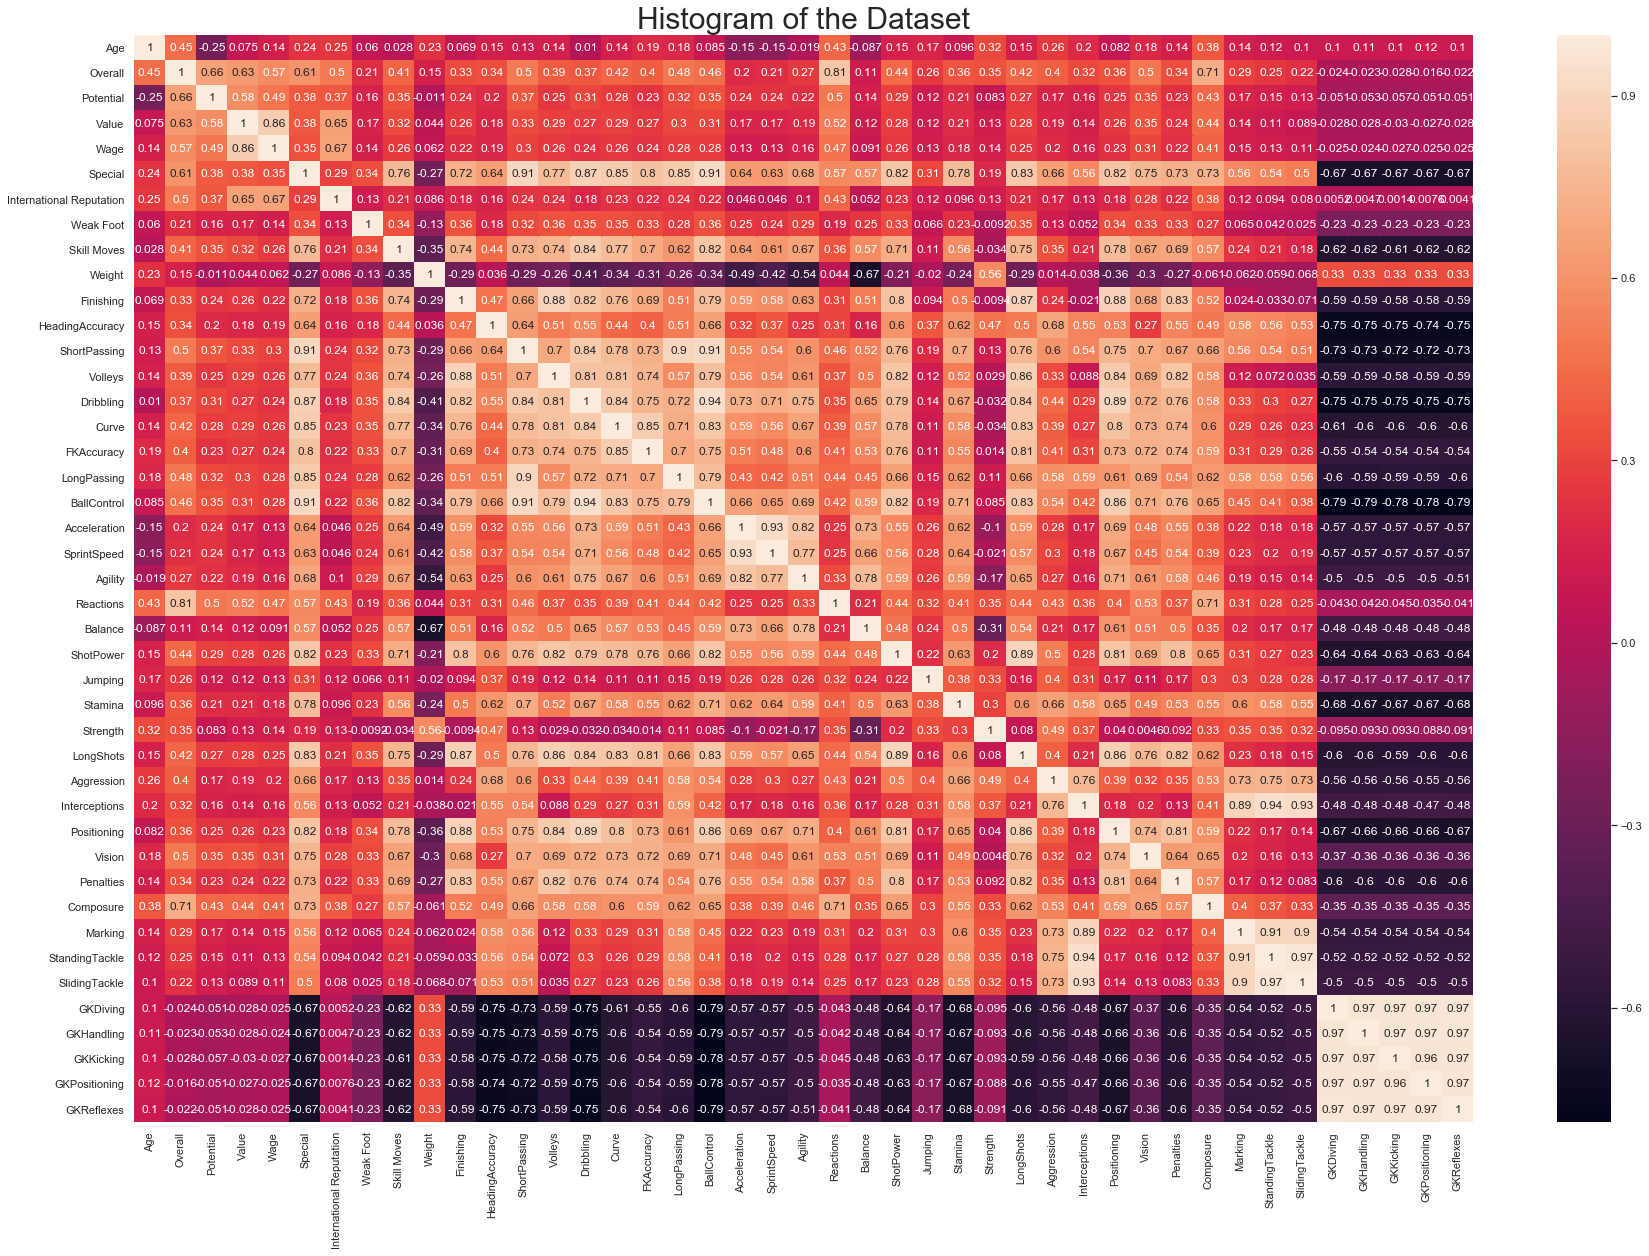

In [40]:
# plotting a correlation heatmap

plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(data_selected[['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']].corr(), annot = True)

plt.title('Histogram of the Dataset', fontsize = 30)
plt.show()

In [41]:
# best players per each position with their age, club, and nationality based on their overall scores

data.iloc[data.groupby(data['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality','Overall']]

Position               Name  Age                      Club Nationality  \
17       CAM       A. Griezmann   27           Atlético Madrid      France   
12        CB           D. Godín   32           Atlético Madrid     Uruguay   
20       CDM    Sergio Busquets   29              FC Barcelona       Spain   
271       CF       Luis Alberto   25                     Lazio       Spain   
67        CM             Thiago   27         FC Bayern München       Spain   
3         GK             De Gea   27         Manchester United       Spain   
28       LAM       J. Rodríguez   26         FC Bayern München    Colombia   
35        LB            Marcelo   30               Real Madrid      Brazil   
24       LCB       G. Chiellini   33                  Juventus       Italy   
11       LCM           T. Kroos   28               Real Madrid     Germany   
14       LDM           N. Kanté   27                   Chelsea      France   
5         LF          E. Hazard   27                   Chelsea     Belgium   
33        LM      P. Aubameyang   29                   Arsenal       Gabon   
21        LS          E. Cavani   31       Paris Saint-Germain     Uruguay   
2         LW          Neymar Jr   26       Paris Saint-Germain      Brazil   
474      LWB          N. Schulz   25       TSG 1899 Hoffenheim     Germany   
129      RAM        J. Cuadrado   30                  Juventus    Colombia   
69        RB        Azpilicueta   28                   Chelsea       Spain   
8        RCB       Sergio Ramos   32               Real Madrid       Spain   
4        RCM       K. De Bruyne   27           Manchester City     Belgium   
45       RDM           P. Pogba   25         Manchester United      France   
0         RF           L. Messi   31              FC Barcelona   Argentina   
25        RM          K. Mbappé   19       Paris Saint-Germain      France   
7         RS          L. Suárez   31              FC Barcelona     Uruguay   
56        RW     Bernardo Silva   23           Manchester City    Portugal   
450      RWB          M. Ginter   24  Borussia Mönchengladbach     Germany   
1         ST  Cristiano Ronaldo   33                  Juventus    Portugal   

     Overall  
17        89  
12        90  
20        89  
271       82  
67        86  
3         91  
28        88  
35        88  
24        89  
11        90  
14        89  
5         91  
33        88  
21        89  
2         92  
474       80  
129       84  
69        86  
8         91  
4         91  
45        87  
0         94  
25        88  
7         91  
56        86  
450       80  
1         94

In [42]:
data.iloc[data.groupby(data['Club'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality','Overall']]

Position              Name  Age                      Club  \
4587        RS       M. Grüttner   32       SSV Jahn Regensburg   
2053        LM    M. Schnatterer   32     1. FC Heidenheim 1846   
5084        ST        L. Spalvis   23      1. FC Kaiserslautern   
189         GK           T. Horn   25                1. FC Köln   
4309        CB       R. Brégerie   31           1. FC Magdeburg   
1298        RM   Matheus Pereira   22            1. FC Nürnberg   
2670        GK      R. Gikiewicz   30        1. FC Union Berlin   
594        RCM         J. Gbamin   22           1. FSV Mainz 05   
3152        LM          R. Nouri   33                AC Ajaccio   
7068       CDM  S. Heltne Nilsen   26                AC Horsens   
3216        RB             Laure   33               AD Alcorcón   
1830       CAM     A. El Khayati   29              ADO Den Haag   
1242       CAM         M. Livaja   24                AEK Athens   
8396        RB       A. Oshilaja   25             AFC Wimbledon   
2133       LCM         K. Olsson   23                       AIK   
2690        LM  R. Philippoteaux   30                AJ Auxerre   
4264       RDM        M. Mostefa   34                AS Béziers   
148         RS            Falcao   32                 AS Monaco   
4887       LCB           E. Seka   31         AS Nancy Lorraine   
147         GK        S. Ruffier   31          AS Saint-Étienne   
1574        RB       J. Svensson   25                AZ Alkmaar   
3367        RM           K. Kusk   26                Aalborg BK   
5570       RCB       P. Kanstrup   29                 Aarhus GF   
2290       CDM        G. Shinnie   26                  Aberdeen   
6677        GK         C. Ripley   25        Accrington Stanley   
3263       CDM            Isaías   31           Adelaide United   
171        RAM         H. Ziyech   25                      Ajax   
1293       CAM             Josué   27      Akhisar Belediyespor   
673        CDM             Souza   29                   Al Ahli   
3610        LS         J. Arango   27                  Al Batin   
...        ...               ...  ...                       ...   
1975        RW        C. Musonda   21                   Vitesse   
1529        RB       Victildinho   34                   Vitória   
1100        GK           Douglas   35         Vitória Guimarães   
1701       RDM            M. Agu   25        Vitória de Setúbal   
6160       LDM            M. Abu   26         Vålerenga Fotball   
2521        LW         M. Vargas   21           Vélez Sarsfield   
2617        GK           D. Roef   24          Waasland-Beveren   
6905       RCB         R. Martin   32                   Walsall   
7919        RM              Rudy   29              Waterford FC   
344        RDM       A. Doucouré   25                   Watford   
4083        RS        R. Krishna   30        Wellington Phoenix   
968         RS      J. Rodriguez   28      West Bromwich Albion   
185         LM   Felipe Anderson   25           West Ham United   
3025       CAM     A. Baumjohann   31  Western Sydney Wanderers   
3457       CAM        J. Windass   24            Wigan Athletic   
1589        ST          Fran Sol   26                 Willem II   
4417       CAM        Jesús Imaz   27              Wisła Kraków   
5222       CAM         S. Štilić   30               Wisła Płock   
4841       CAM         M. Liendl   32            Wolfsberger AC   
213         GK      Rui Patrício   30   Wolverhampton Wanderers   
7699        LM      F. Onyedinma   21         Wycombe Wanderers   
2079        ST        K. Boutaïb   31          Yeni Malatyaspor   
11376      RCB        O. Sowunmi   22               Yeovil Town   
3670        RM         O. Boumal   28       Yokohama F. Marinos   
5919       RCB      M. Dąbrowski   31            Zagłębie Lubin   
10324       LM     K. Wrzesiński   24        Zagłębie Sosnowiec   
1531        RM           A. Umar   23           Çaykur Rizespor   
4344       CAM         N. Besara   27                

In [43]:
# best players from each positions with their age, nationality, club based on their potential scores

data.iloc[data.groupby(data['Position'])['Potential'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']]

Position                 Name  Age                     Club Nationality
31       CAM           C. Eriksen   26        Tottenham Hotspur     Denmark
42        CB            S. Umtiti   24             FC Barcelona      France
27       CDM             Casemiro   26              Real Madrid      Brazil
350       CF             A. Milik   24                   Napoli      Poland
78        CM  S. Milinković-Savić   23                    Lazio      Serbia
3         GK               De Gea   27        Manchester United       Spain
28       LAM         J. Rodríguez   26        FC Bayern München    Colombia
35        LB              Marcelo   30              Real Madrid      Brazil
77       LCB          M. Škriniar   23                    Inter    Slovakia
11       LCM             T. Kroos   28              Real Madrid     Germany
14       LDM             N. Kanté   27                  Chelsea      France
15        LF            P. Dybala   24                 Juventus   Argentina
415       LM             H. Aouar   20       Olympique Lyonnais      France
21        LS            E. Cavani   31      Paris Saint-Germain     Uruguay
2         LW            Neymar Jr   26      Paris Saint-Germain      Brazil
601      LWB                Jonny   24  Wolverhampton Wanderers       Spain
171      RAM            H. Ziyech   25                     Ajax     Morocco
247       RB         João Cancelo   24                 Juventus    Portugal
8        RCB         Sergio Ramos   32              Real Madrid       Spain
4        RCM         K. De Bruyne   27          Manchester City     Belgium
45       RDM             P. Pogba   25        Manchester United      France
0         RF             L. Messi   31             FC Barcelona   Argentina
25        RM            K. Mbappé   19      Paris Saint-Germain      France
7         RS            L. Suárez   31             FC Barcelona     Uruguay
79        RW        Marco Asensio   22              Real Madrid       Spain
766      RWB         Pablo Maffeo   20            VfB Stuttgart       Spain
1         ST    Cristiano Ronaldo   33                 Juventus    Portugal

In [44]:
# picking up the countries with highest number of players to compare their overall scores

data['Nationality'].value_counts().head(50)

England                1662
Germany                1198
Spain                  1072
Argentina               937
France                  914
Brazil                  827
Italy                   702
Colombia                618
Japan                   478
Netherlands             453
Sweden                  397
China PR                392
Chile                   391
Republic of Ireland     368
Mexico                  366
United States           353
Poland                  350
Norway                  341
Saudi Arabia            340
Denmark                 336
Korea Republic          335
Portugal                322
Turkey                  303
Austria                 298
Scotland                286
Belgium                 260
Australia               236
Switzerland             220
Uruguay                 149
Senegal                 130
Wales                   129
Serbia                  126
Croatia                 126
Nigeria                 121
Ghana                   114
Greece              

In [47]:
# picking up the countries with highest number of players to compare their overall scores

indian_players = data[data['Nationality'] == 'India']

In [49]:
indian_players.shape

(30, 88)

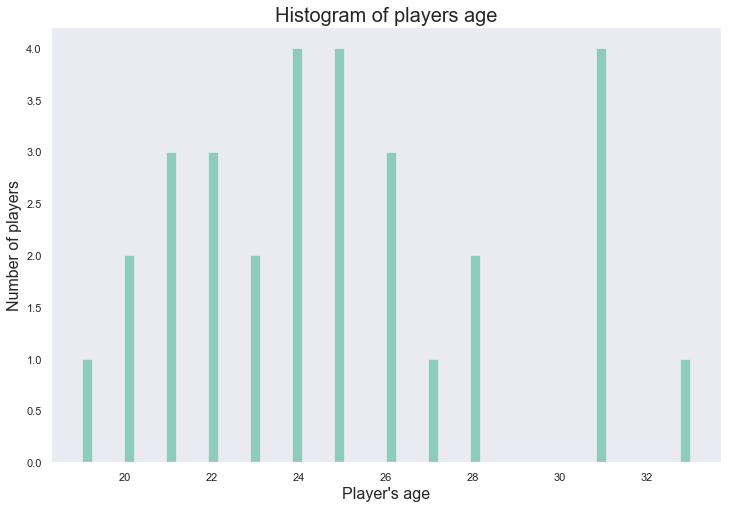

In [50]:
# To show that there are people having same age
# Histogram: number of players's age

sns.set(style = "dark", palette = "colorblind", color_codes = True)
x = indian_players.Age
plt.figure(figsize = (12,8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'g')
ax.set_xlabel(xlabel = "Player\'s age", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players age', fontsize = 20)
plt.show()

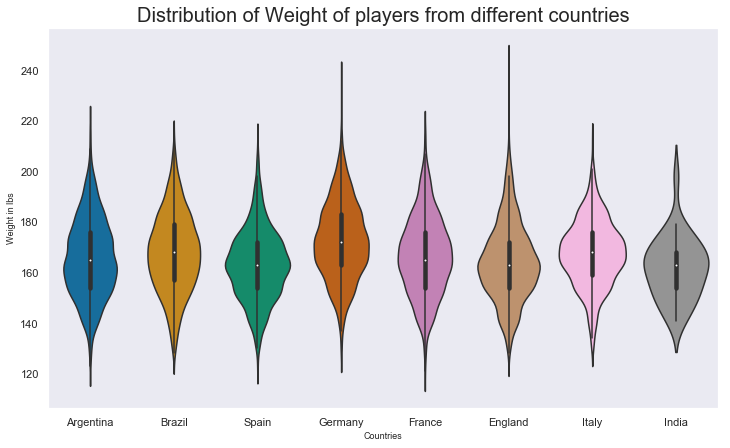

In [52]:
# Every Nations' Player and their Weights

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'India')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Weight']]

plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.violinplot(x = data_countries['Nationality'], y = data_countries['Weight'], palette = 'colorblind')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Weight in lbs', fontsize = 9)
ax.set_title(label = 'Distribution of Weight of players from different countries', fontsize = 20)
plt.show()

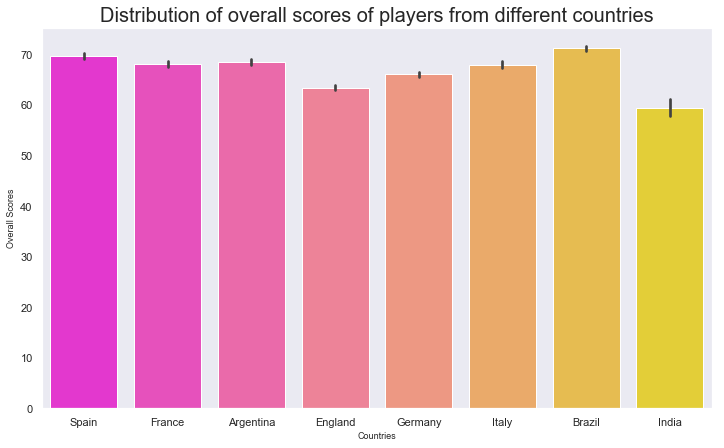

In [53]:
# Every Nations' Player and their overall scores

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'India')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Overall']]

plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Overall'], palette = 'spring')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

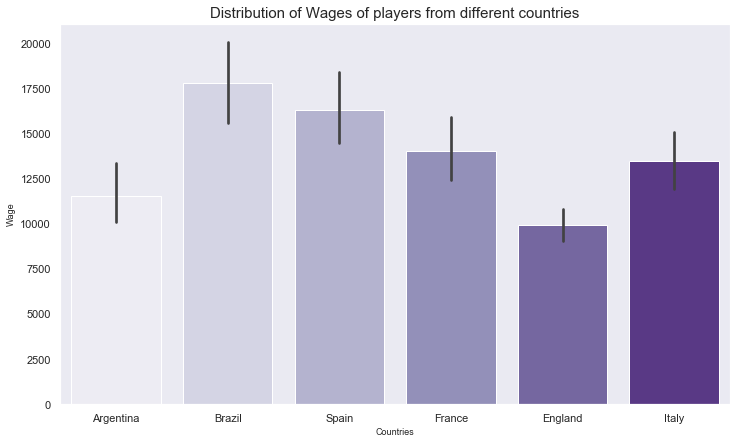

In [55]:
# Every Nations' Player and their wages

some_countries = ('England', 'India', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Wage']]

plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Wage'], palette = 'Purples')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Wage', fontsize = 9)
ax.set_title(label = 'Distribution of Wages of players from different countries', fontsize = 15)
plt.show()

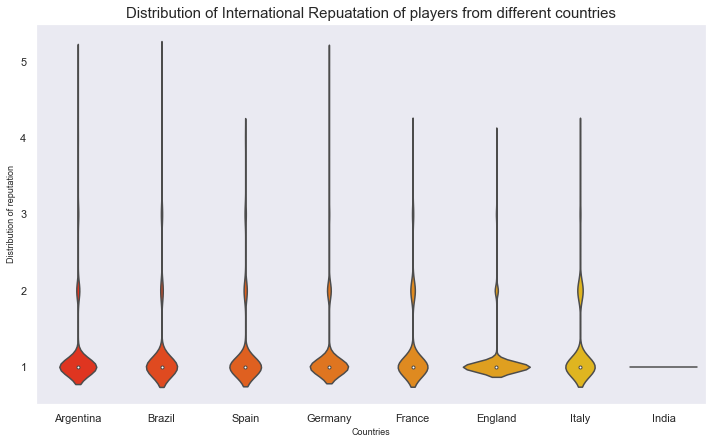

In [56]:
# Every Nations' Player and their International Reputation

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'India')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['International Reputation']]

plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.violinplot(x = data_countries['Nationality'], y = data_countries['International Reputation'], palette = 'autumn')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Distribution of reputation', fontsize = 9)
ax.set_title(label = 'Distribution of International Repuatation of players from different countries', fontsize = 15)
plt.show()

In [57]:
data['Club'].value_counts().head(10)

No Club                    241
Wolverhampton Wanderers     33
Southampton                 33
Frosinone                   33
FC Barcelona                33
Newcastle United            33
Valencia CF                 33
Cardiff City                33
Everton                     33
Rayo Vallecano              33
Name: Club, dtype: int64

In [59]:
data[data['Nationality'] == 'India']['Club'].value_counts().head(10)

No Club    30
Name: Club, dtype: int64

In [63]:
data[data['Nationality'] == 'England']['Club'].value_counts()

Portsmouth                  24
Shrewsbury                  24
Tranmere Rovers             24
AFC Wimbledon               23
Oxford United               23
Port Vale                   23
Bolton Wanderers            23
Bournemouth                 22
Macclesfield Town           22
Walsall                     22
Blackburn Rovers            22
Colchester United           22
Burton Albion               22
Exeter City                 21
Middlesbrough               21
Burnley                     21
Grimsby Town                21
Accrington Stanley          21
Swindon Town                21
Doncaster Rovers            21
Mansfield Town              20
Gillingham                  20
Milton Keynes Dons          20
West Bromwich Albion        20
Morecambe                   20
Scunthorpe United           20
Cambridge United            20
Ipswich Town                20
Fleetwood Town              20
Birmingham City             20
                            ..
DC United                    1
Brisbane

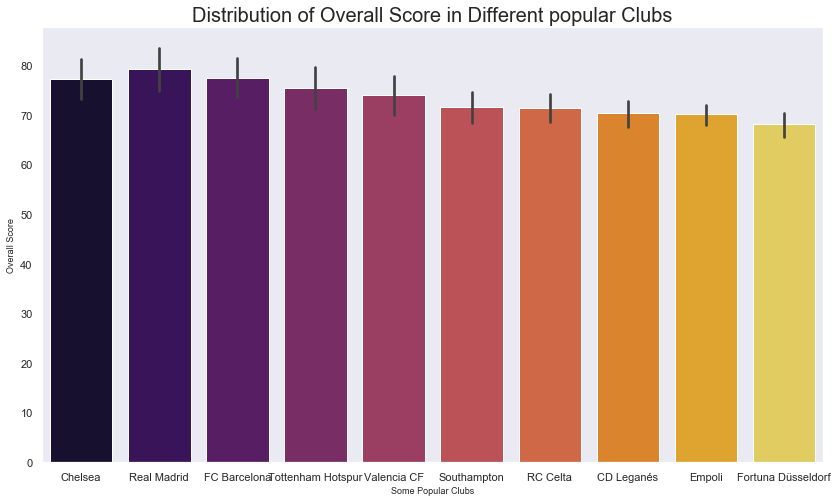

In [64]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']]

plt.rcParams['figure.figsize'] = (14, 8)
ax = sns.barplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.show()

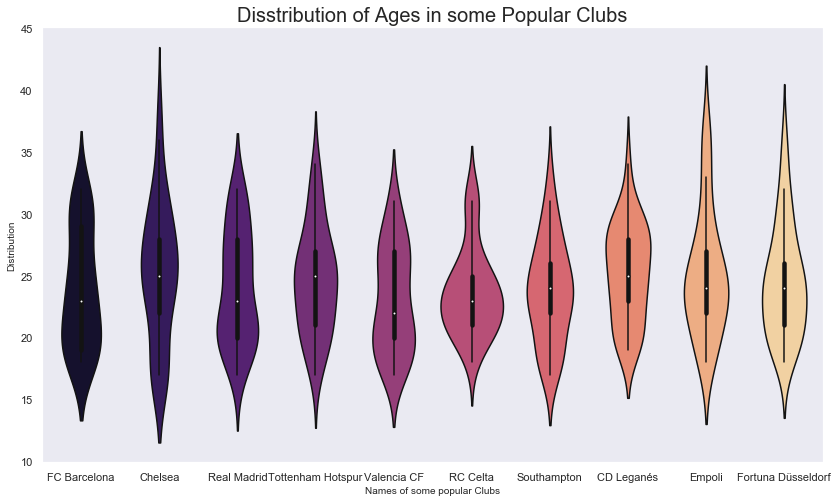

In [65]:
# Distribution of Ages in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (14, 8)
ax = sns.violinplot(x = 'Club', y = 'Age', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Ages in some Popular Clubs', fontsize = 20)
plt.show()

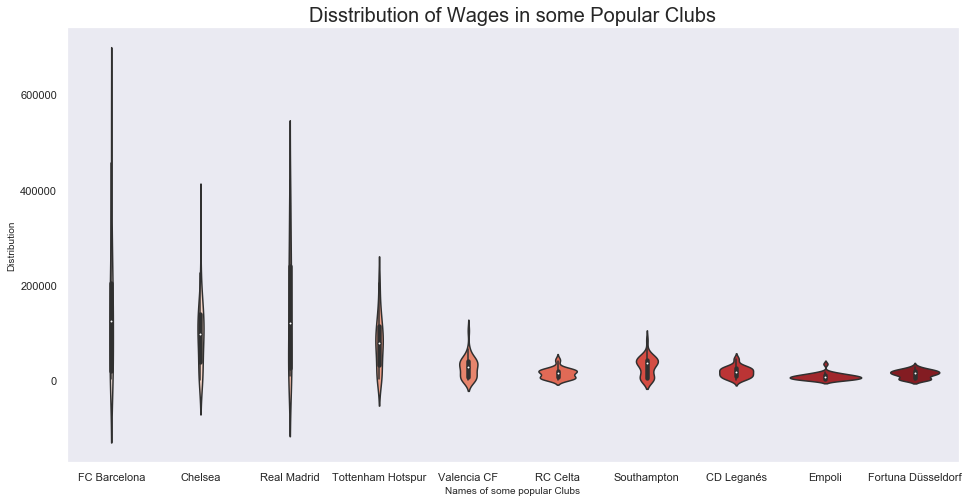

In [66]:
# Distribution of Wages in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.violinplot(x = 'Club', y = 'Wage', data = data_club, palette = 'Reds')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Wages in some Popular Clubs', fontsize = 20)
plt.show()

In [77]:
england_db = data[data['Nationality'] == 'England']

In [78]:
england_db['Club'].unique()

array(['Tottenham Hotspur', 'Manchester City', 'Everton',
       'Leicester City', 'Manchester United', 'Liverpool', 'Burnley',
       'Stoke City', 'Chelsea', 'DC United', 'Bournemouth',
       'West Ham United', 'Southampton', 'Newcastle United',
       'Brighton & Hove Albion', 'Crystal Palace', 'Arsenal',
       'West Bromwich Albion', 'Borussia Dortmund', 'Watford',
       'Derby County', 'Aston Villa', 'Lazio', 'Huddersfield Town',
       'Fulham', 'Middlesbrough', 'Preston North End', 'Celtic',
       'Brentford', 'Girona FC', 'Leeds United', 'Reading',
       'Wolverhampton Wanderers', 'Rangers FC', 'Cardiff City',
       'Blackburn Rovers', 'Nottingham Forest', 'Millwall',
       'Sheffield United', 'Aberdeen', 'Queens Park Rangers',
       'Sheffield Wednesday', 'Swansea City', 'Bristol City',
       'Wigan Athletic', 'Sampdoria', 'Bolton Wanderers',
       'Colorado Rapids', 'LA Galaxy', 'Birmingham City',
       'Toulouse Football Club', 'Göztepe SK', 'Hull City',
       'N

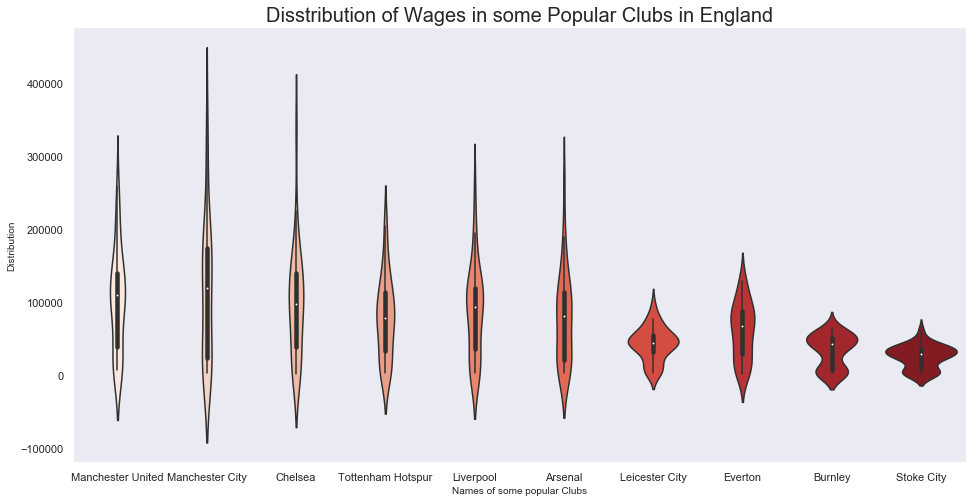

In [79]:
# Distribution of Wages in some Popular clubs

some_clubs = ('Tottenham Hotspur', 'Manchester City', 'Everton',
       'Leicester City', 'Manchester United', 'Liverpool', 'Burnley',
       'Stoke City', 'Chelsea','Arsenal')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.violinplot(x = 'Club', y = 'Wage', data = data_club, palette = 'Reds')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Wages in some Popular Clubs in England', fontsize = 20)
plt.show()

In [80]:
spain_db = data[data['Nationality'] == 'Spain']

In [81]:
spain_db['Club'].unique()

array(['Manchester United', 'Real Madrid', 'Manchester City',
       'FC Barcelona', 'FC Bayern München', 'Chelsea', 'Vissel Kobe',
       'Atlético Madrid', 'Valencia CF', 'RC Celta', 'Real Sociedad',
       'Napoli', 'Villarreal CF', 'Milan', 'Real Betis',
       'Athletic Club de Bilbao', 'Sevilla FC', 'Lazio',
       'Beijing Sinobo Guoan FC', 'Roma', 'New York City FC', 'FC Porto',
       'Levante UD', 'SL Benfica', 'Borussia Dortmund', 'SD Eibar',
       'Inter', 'Deportivo Alavés', 'Girona FC', 'Arsenal', 'Watford',
       'Torino', 'Crystal Palace', 'VfL Wolfsburg', 'RCD Espanyol',
       'Sagan Tosu', 'Wolverhampton Wanderers', 'Fulham',
       'Leicester City', 'Getafe CF', 'VfB Stuttgart', 'FC Schalke 04',
       'KRC Genk', 'Southampton', 'West Ham United', 'Al Ahli',
       '1. FSV Mainz 05', '1. FC Köln', 'Brighton & Hove Albion',
       'Real Valladolid CF', 'UD Las Palmas', 'PSV', 'Liverpool',
       'CD Leganés', 'Guizhou Hengfeng FC', 'Paris Saint-Germain',
       'Ne

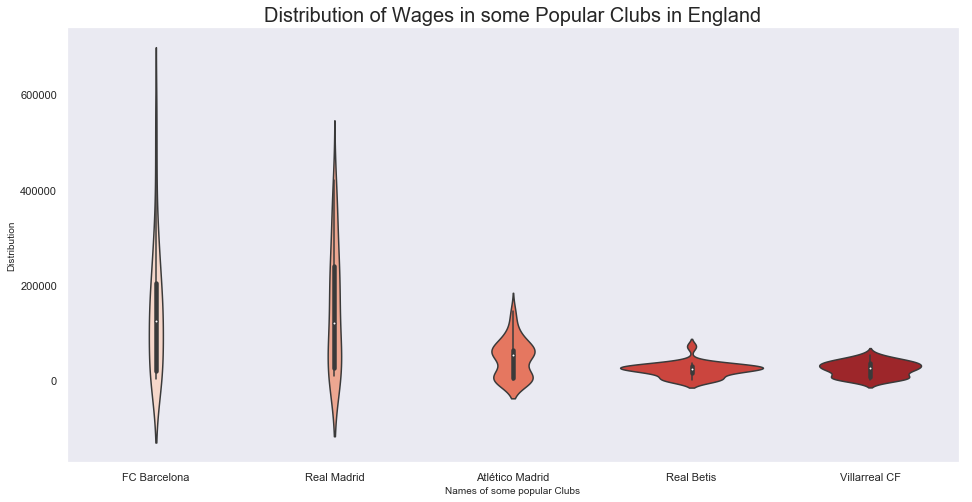

In [83]:
# Distribution of Wages in some Popular clubs

some_clubs = ('Villarreal CF','Real Betis','Atlético Madrid','FC Barcelona','Real Madrid','Sevilla')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.violinplot(x = 'Club', y = 'Wage', data = data_club, palette = 'Reds')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Distribution of Wages in some Popular Clubs in England', fontsize = 20)
plt.show()

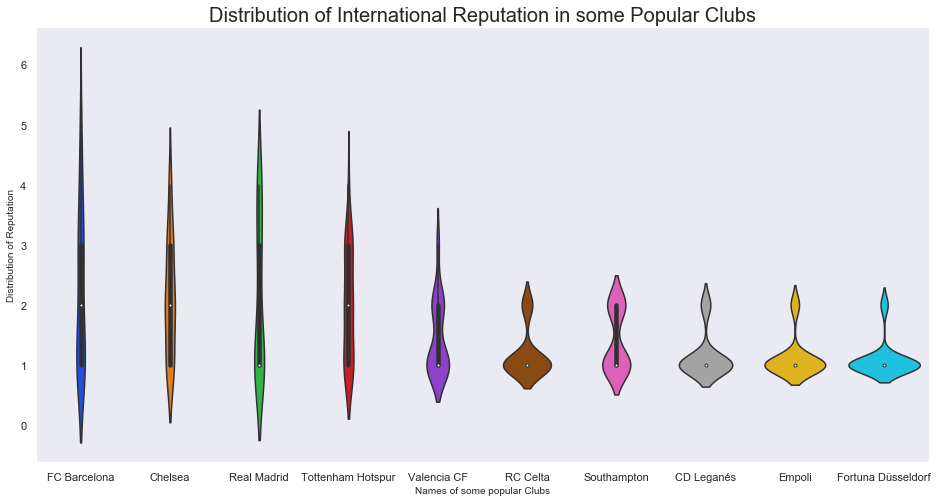

In [84]:
# Distribution of Wages in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['International Reputation']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.violinplot(x = 'Club', y = 'International Reputation', data = data_club, palette = 'bright')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution of Reputation', fontsize = 10)
ax.set_title(label = 'Distribution of International Reputation in some Popular Clubs', fontsize = 20)
plt.show()

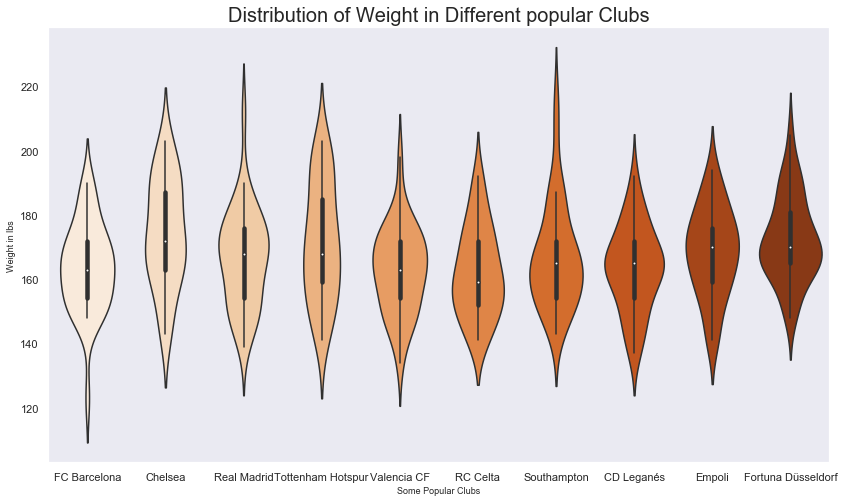

In [85]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Weight']]

plt.rcParams['figure.figsize'] = (14, 8)
ax = sns.violinplot(x = 'Club', y = 'Weight', data = data_clubs, palette = 'Oranges')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Weight in lbs', fontsize = 9)
ax.set_title(label = 'Distribution of Weight in Different popular Clubs', fontsize = 20)
plt.show()

In [86]:
# finding 15 youngest Players from the dataset

youngest = data.sort_values('Age', ascending = True)[['Name', 'Age', 'Club', 'Nationality']].head(15)
print(youngest)

                 Name  Age               Club          Nationality
18206       G. Nugent   16    Tranmere Rovers              England
17743       J. Olstad   16    Sarpsborg 08 FF               Norway
13293     H. Massengo   16          AS Monaco               France
16081     J. Italiano   16        Perth Glory            Australia
18166        N. Ayéva   16          Örebro SK               Sweden
17712        K. Broda   16       Wisła Kraków               Poland
17354     L. D'Arrigo   16    Adelaide United            Australia
13567  Y. Verschaeren   16     RSC Anderlecht              Belgium
16927       B. Nygren   16       IFK Göteborg               Sweden
18018     B. O'Gorman   16     Bray Wanderers  Republic of Ireland
17091        A. Doğan   16        Kayserispor               Turkey
17115      C. Bassett   16    Colorado Rapids        United States
15793        J. Lahne   16  IF Brommapojkarna               Sweden
15746     Y. Begraoui   16         AJ Auxerre               Fr

In [87]:
# finding 15 eldest players from the dataset

eldest = data.sort_values('Age', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15)
print(eldest)

                  Name  Age                          Club        Nationality
4741          O. Pérez   45                       Pachuca             Mexico
18183    K. Pilkington   44              Cambridge United            England
17726        T. Warner   44            Accrington Stanley  Trinidad & Tobago
10545      S. Narazaki   42                Nagoya Grampus              Japan
7225          C. Muñoz   41  CD Universidad de Concepción          Argentina
1120         J. Villar   41                       No Club           Paraguay
12192     H. Sulaimani   41                     Ohod Club       Saudi Arabia
15426         M. Tyler   41           Peterborough United            England
4228          B. Nivet   41                  ESTAC Troyes             France
10356         F. Kippe   40                 Lillestrøm SK             Norway
16264  P. van der Vlag   40                      FC Emmen        Netherlands
9484       B. Castillo   40                Atlético Huila           Colombia

In [88]:
# defining the features of players

player_features = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties')

# Top four features for every position in football

for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Acceleration
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: Aggression, BallControl, LongPassing
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Acceleration, 

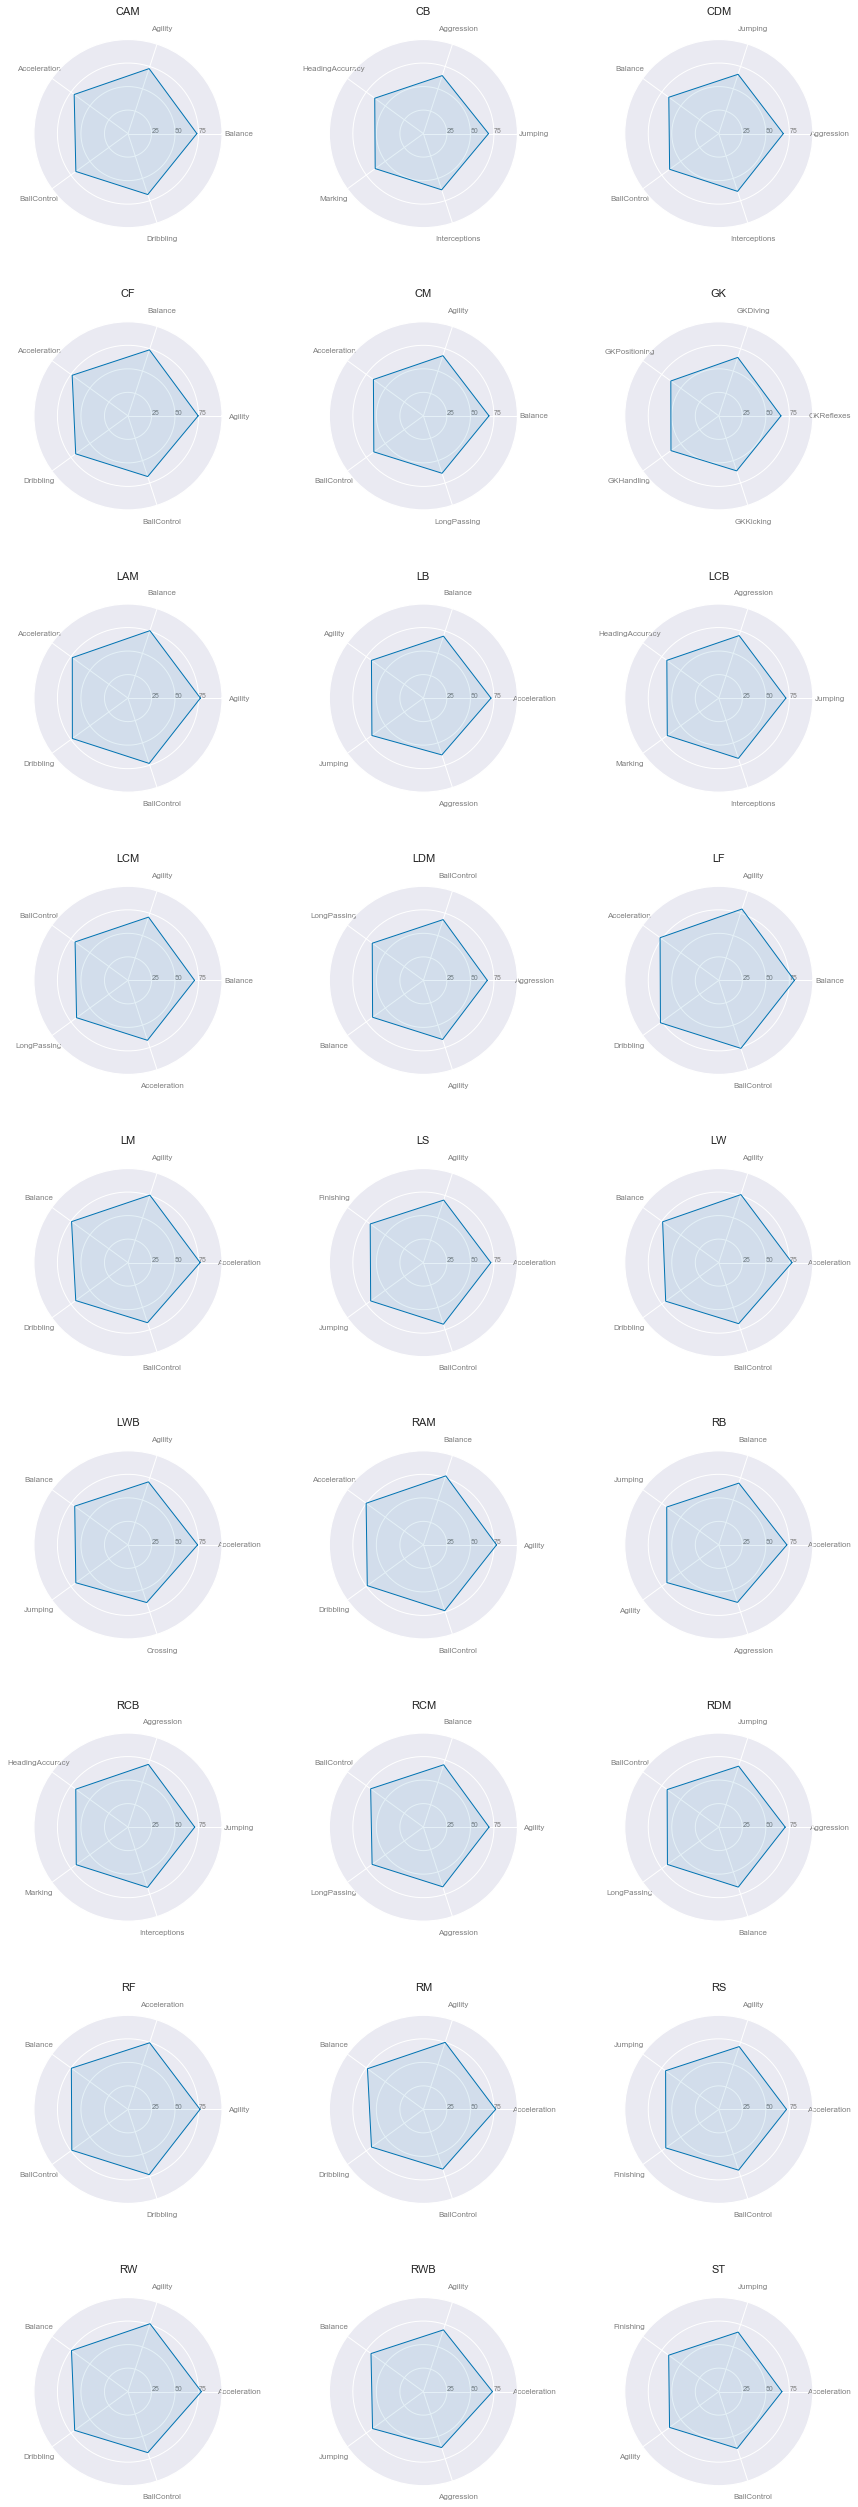

In [89]:
from math import pi

idx = 1
plt.figure(figsize=(15,45))
for position_name, features in data.groupby(data['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(9, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1 

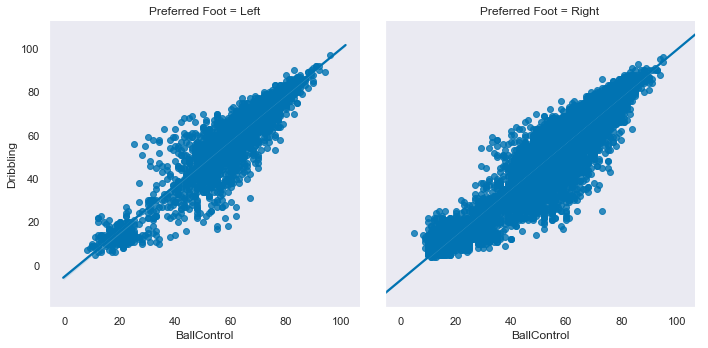

In [90]:
# comparing the performance of left-footed and right-footed footballers
# ballcontrol vs dribbing

sns.lmplot(x = 'BallControl', y = 'Dribbling', data = data, col = 'Preferred Foot')

In [91]:
data[selected_columns]

Name  Age          Nationality  Overall  Potential  \
0                  L. Messi   31            Argentina       94         94   
1         Cristiano Ronaldo   33             Portugal       94         94   
2                 Neymar Jr   26               Brazil       92         93   
3                    De Gea   27                Spain       91         93   
4              K. De Bruyne   27              Belgium       91         92   
5                 E. Hazard   27              Belgium       91         91   
6                 L. Modrić   32              Croatia       91         91   
7                 L. Suárez   31              Uruguay       91         91   
8              Sergio Ramos   32                Spain       91         91   
9                  J. Oblak   25             Slovenia       90         93   
10           R. Lewandowski   29               Poland       90         90   
11                 T. Kroos   28              Germany       90         90   
12                 D. Godín   32              Uruguay       90         90   
13              David Silva   32                Spain       90         90   
14                 N. Kanté   27               France       89         90   
15                P. Dybala   24            Argentina       89         94   
16                  H. Kane   24              England       89         91   
17             A. Griezmann   27               France       89         90   
18            M. ter Stegen   26              Germany       89         92   
19              T. Courtois   26              Belgium       89         90   
20          Sergio Busquets   29                Spain       89         89   
21                E. Cavani   31              Uruguay       89         89   
22                 M. Neuer   32              Germany       89         89   
23                S. Agüero   30            Argentina       89         89   
24             G. Chiellini   33                Italy       89         89   
25                K. Mbappé   19               France       88         95   
26                 M. Salah   26                Egypt       88         89   
27                 Casemiro   26               Brazil       88         90   
28             J. Rodríguez   26             Colombia       88         89   
29               L. Insigne   27                Italy       88         88   
...                     ...  ...                  ...      ...        ...   
18177             R. Roache   18  Republic of Ireland       48         69   
18178          L. Wahlstedt   18               Sweden       48         65   
18179           J. Williams   17              England       48         64   
18180              M. Hurst   22             Scotland       48         58   
18181              C. Maher   17  Republic of Ireland       48         66   
18182               Y. Góez   18             Colombia       48         65   
18183         K. Pilkington   44              England       48         48   
18184             D. Horton   18              England       48         55   
18185              E. Tweed   19  Republic of Ireland       48         59   
18186          Zhang Yufeng   20             China PR       47         64   
18187             C. Ehlich   19              Germany       47         59   
18188            L. Collins   17                Wales       47         62   
18189            A. Kaltner   18              Germany       47         61   
18190            L. Watkins   18              England       47         67   
18191  J. Norville-Williams   18              England       47         65   
18192             S. Squire   18              England       47         64   
18193            N. Fuentes   18                Chile       47         64   
18194              J. Milli   18                Italy       47         65   
18195            S. Griffin   18  Republic of Ireland       47         67   
18196           K. Fujikawa   19                Japan       47         61   
18197            D.

In [97]:
players = data[['Name','Overall','Value','Marking','StandingTackle','SlidingTackle','GKPositioning','Flag','Age',
                'Nationality', 'Photo', 'Club_Logo', 'Club']]

In [98]:
players.head()

Name  Overall        Value  Marking  StandingTackle  \
0           L. Messi       94  110500000.0     33.0            28.0   
1  Cristiano Ronaldo       94   77000000.0     28.0            31.0   
2          Neymar Jr       92  118500000.0     27.0            24.0   
3             De Gea       91   72000000.0     15.0            21.0   
4       K. De Bruyne       91  102000000.0     68.0            58.0   

   SlidingTackle  GKPositioning                                 Flag  Age  \
0           26.0           14.0  https://cdn.sofifa.org/flags/52.png   31   
1           23.0           14.0  https://cdn.sofifa.org/flags/38.png   33   
2           33.0           15.0  https://cdn.sofifa.org/flags/54.png   26   
3           13.0           88.0  https://cdn.sofifa.org/flags/45.png   27   
4           51.0           10.0   https://cdn.sofifa.org/flags/7.png   27   

  Nationality                                           Photo  \
0   Argentina  https://cdn.sofifa.org/players/4/19/158023.png   
1    Portugal   https://cdn.sofifa.org/players/4/19/20801.png   
2      Brazil  https://cdn.sofifa.org/players/4/19/190871.png   
3       Spain  https://cdn.sofifa.org/players/4/19/193080.png   
4     Belgium  https://cdn.sofifa.org/players/4/19/192985.png   

                                      Club_Logo                 Club  
0  https://cdn.sofifa.org/teams/2/light/241.png         FC Barcelona  
1   https://cdn.sofifa.org/teams/2/light/45.png             Juventus  
2   https://cdn.sofifa.org/teams/2/light/73.png  Paris Saint-Germain  
3   https://cdn.sofifa.org/teams/2/light/11.png    Manchester United  
4   https://cdn.sofifa.org/teams/2/light/10.png      Manchester City

In [99]:
import requests
import random
from math import pi

import matplotlib.image as mpimg
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)

def details(row, title, image, age, nationality, photo, logo, club):
    
    flag_image = "img_flag.jpg"
    player_image = "img_player.jpg"
    logo_image = "img_club_logo.jpg"
        
    img_flag = requests.get(image).content
    with open(flag_image, 'wb') as handler:
        handler.write(img_flag)
    
    player_img = requests.get(photo).content
    with open(player_image, 'wb') as handler:
        handler.write(player_img)
     
    logo_img = requests.get(logo).content
    with open(logo_image, 'wb') as handler:
        handler.write(logo_img)
        
    r = lambda: random.randint(0,255)
    colorRandom = '#%02X%02X%02X' % (r(),r(),r())
    
    if colorRandom == '#ffffff':colorRandom = '#a5d6a7'
    
    basic_color = '#37474f'
    color_annotate = '#01579b'
    
    img = mpimg.imread(flag_image)
    
    plt.figure(figsize=(15,8))
    categories=list(players)[1:]
    coulumnDontUseGraph = ['Flag', 'Age', 'Nationality', 'Photo', 'Logo', 'Club']
    N = len(categories) - len(coulumnDontUseGraph)
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(111, projection='polar')
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, color= 'black', size=17)
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75,100], ["25","50","75","100"], color= basic_color, size= 10)
    plt.ylim(0,100)
    
    values = players.loc[row].drop('Name').values.flatten().tolist() 
    valuesDontUseGraph = [image, age, nationality, photo, logo, club]
    values = [e for e in values if e not in (valuesDontUseGraph)]
    values += values[:1]
    
    ax.plot(angles, values, color= basic_color, linewidth=1, linestyle='solid')
    ax.fill(angles, values, color= colorRandom, alpha=0.5)
    axes_coords = [0, 0, 1, 1]
    ax_image = plt.gcf().add_axes(axes_coords,zorder= -1)
    ax_image.imshow(img,alpha=0.5)
    ax_image.axis('off')
    
    ax.annotate('Nationality: ' + nationality.upper(), xy=(10,10), xytext=(103, 138),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
                      
    ax.annotate('Age: ' + str(age), xy=(10,10), xytext=(43, 180),
                fontsize= 15,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
    
    ax.annotate('Team: ' + club.upper(), xy=(10,10), xytext=(92, 168),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})

    arr_img_player = plt.imread(player_image, format='jpg')

    imagebox_player = OffsetImage(arr_img_player)
    imagebox_player.image.axes = ax
    abPlayer = AnnotationBbox(imagebox_player, (0.5, 0.7),
                        xybox=(313, 223),
                        xycoords='data',
                        boxcoords="offset points"
                        )
    arr_img_logo = plt.imread(logo_image, format='jpg')

    imagebox_logo = OffsetImage(arr_img_logo)
    imagebox_logo.image.axes = ax
    abLogo = AnnotationBbox(imagebox_logo, (0.5, 0.7),
                        xybox=(-320, -226),
                        xycoords='data',
                        boxcoords="offset points"
                        )

    ax.add_artist(abPlayer)
    ax.add_artist(abLogo)

    plt.title(title, size=50, color= basic_color)

In [100]:
# defining a polar graph

def graphPolar(id = 0):
    if 0 <= id < len(data.ID):
        details(row = players.index[id], 
                title = players['Name'][id], 
                age = players['Age'][id], 
                photo = players['Photo'][id],
                nationality = players['Nationality'][id],
                image = players['Flag'][id], 
                logo = players['Club_Logo'][id], 
                club = players['Club'][id])
    else:
        print('The base has 17917 players. You can put positive numbers from 0 to 17917')

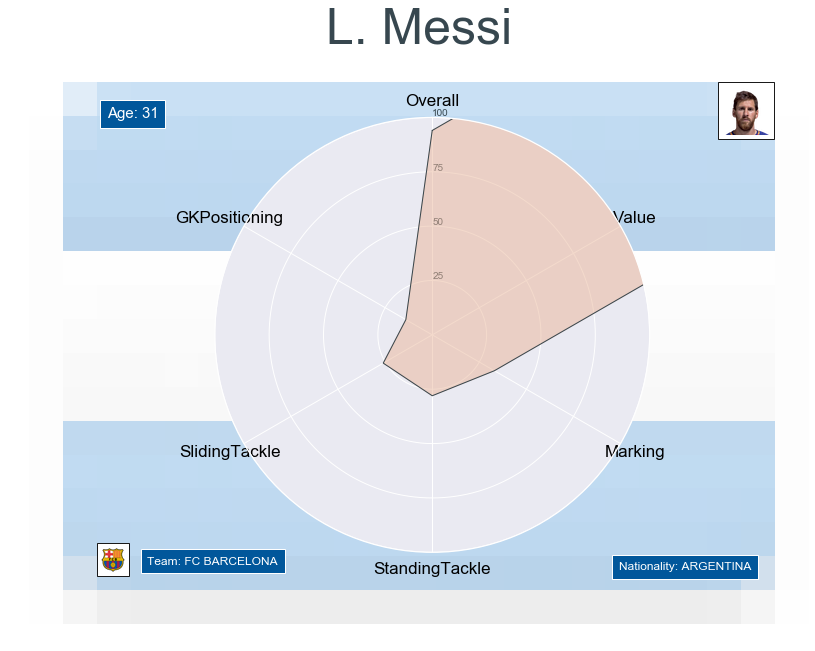

In [101]:
graphPolar(0)

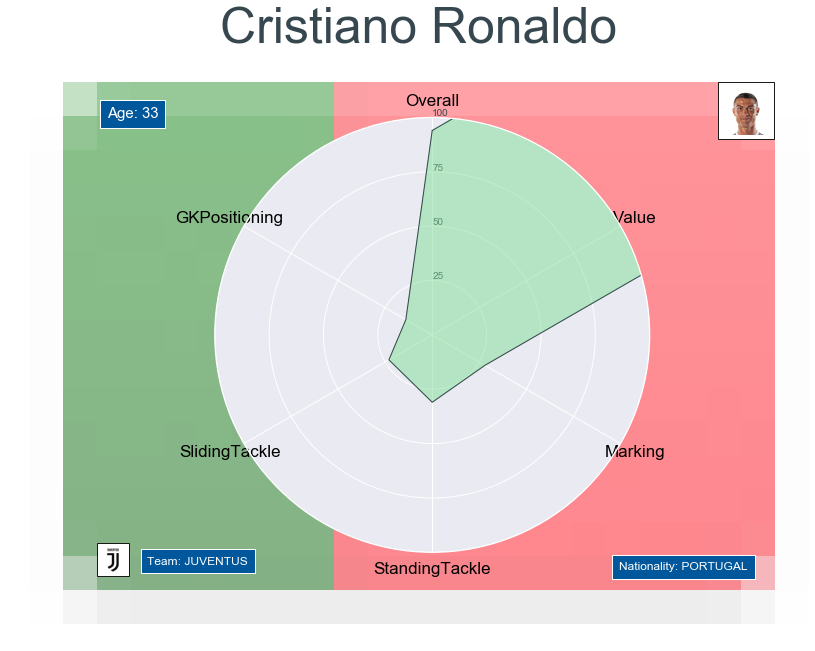

In [102]:
graphPolar(1)

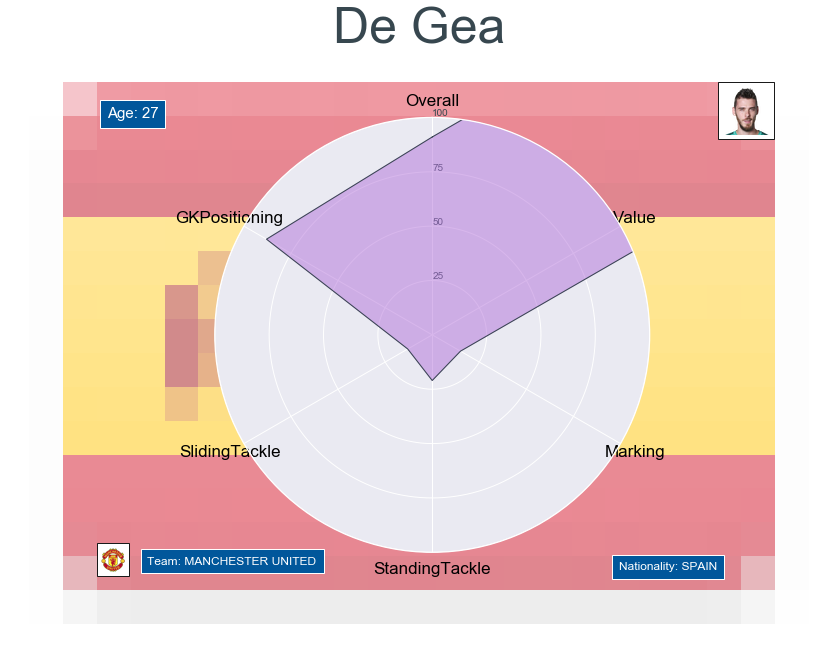

In [103]:
graphPolar(3)

In [104]:
indian_players

ID             Name  Age  \
8605   190939       S. Chhetri   33   
10011  223763       S. Jhingan   24   
12598  217225    J. Lalpekhlua   27   
12811  225213  G. Singh Sandhu   26   
13508  238205    A. Edathodika   31   
14054  231461        P. Halder   25   
14199  228188         P. Kotal   24   
14218  208485         L. Ralte   25   
14705  223764           N. Das   24   
14786  233524         U. Singh   22   
14915  228199       H. Narzary   24   
15356  212502         R. Singh   28   
15643  245166         S. Singh   22   
15652  245170         A. Thapa   20   
15855  234507       M. Rafique   25   
15864  223760         A. Singh   25   
15884  223771         B. Singh   31   
16135  245165          S. Bose   22   
16265  231933        R. Borges   26   
16450  193911          S. Paul   31   
16499  221588        A. Mondal   28   
16539  245167  L. Lalruatthara   23   
16793  228192       E. Lyngdoh   31   
16903  245169   J. Lalrinzuala   19   
16976  236774     A. Kuruniyan   21   
17129  228198         J. Singh   26   
17197  245164         V. Kaith   21   
17339  233526         S. Passi   23   
17436  236452   D. Lalhlimpuia   20   
17539  234508         C. Singh   21   

                                                Photo Nationality  \
8605   https://cdn.sofifa.org/players/4/19/190939.png       India   
10011  https://cdn.sofifa.org/players/4/19/223763.png       India   
12598  https://cdn.sofifa.org/players/4/19/217225.png       India   
12811  https://cdn.sofifa.org/players/4/19/225213.png       India   
13508  https://cdn.sofifa.org/players/4/19/238205.png       India   
14054  https://cdn.sofifa.org/players/4/19/231461.png       India   
14199  https://cdn.sofifa.org/players/4/19/228188.png       India   
14218  https://cdn.sofifa.org/players/4/19/208485.png       India   
14705  https://cdn.sofifa.org/players/4/19/223764.png       India   
14786  https://cdn.sofifa.org/players/4/19/233524.png       India   
14915  https://cdn.sofifa.org/players/4/19/228199.png       India   
15356  https://cdn.sofifa.org/players/4/19/212502.png       India   
15643  https://cdn.sofifa.org/players/4/19/245166.png       India   
15652  https://cdn.sofifa.org/players/4/19/245170.png       India   
15855  https://cdn.sofifa.org/players/4/19/234507.png       India   
15864  https://cdn.sofifa.org/players/4/19/223760.png       India   
15884  https://cdn.sofifa.org/players/4/19/223771.png       India   
16135  https://cdn.sofifa.org/players/4/19/245165.png       India   
16265  https://cdn.sofifa.org/players/4/19/231933.png       India   
16450  https://cdn.sofifa.org/players/4/19/193911.png       India   
16499  https://cdn.sofifa.org/players/4/19/221588.png       India   
16539  https://cdn.sofifa.org/players/4/19/245167.png       India   
16793  https://cdn.sofifa.org/players/4/19/228192.png       India   
16903  https://cdn.sofifa.org/players/4/19/245169.png       India   
16976  https://cdn.sofifa.org/players/4/19/236774.png       India   
17129  https://cdn.sofifa.org/players/4/19/228198.png       India   
17197  https://cdn.sofifa.org/players/4/19/245164.png       India   
17339  https://cdn.sofifa.org/players/4/19/233526.png       India   
17436  https://cdn.sofifa.org/players/4/19/236452.png       India   
17539  https://cdn.sofifa.org/players/4/19/234508.png       India   

                                       Flag  Overall  Potential     Club  \
8605   https://cdn.sofifa.org/flags/159.png       67         67  No Club   
10011  https://cdn.sofifa.org/flags/159.png       65         71  No Club   
12598  https://cdn.sofifa.org/flags/159.png       63         64  No Club   
12811  https://cdn.sofifa.org/flags/159.png       63         68  No Club   
13508  https://cdn.sofifa.org/flags/159.png       62         62  No Club   
14054  https://cdn.sofifa.org/flags/159.png       61         67  No Club   
14199  https://cdn.sofifa.org/flags/159.png       61         66  No Club   
14218  https://cdn.sofifa.org/flags/159.png       61 

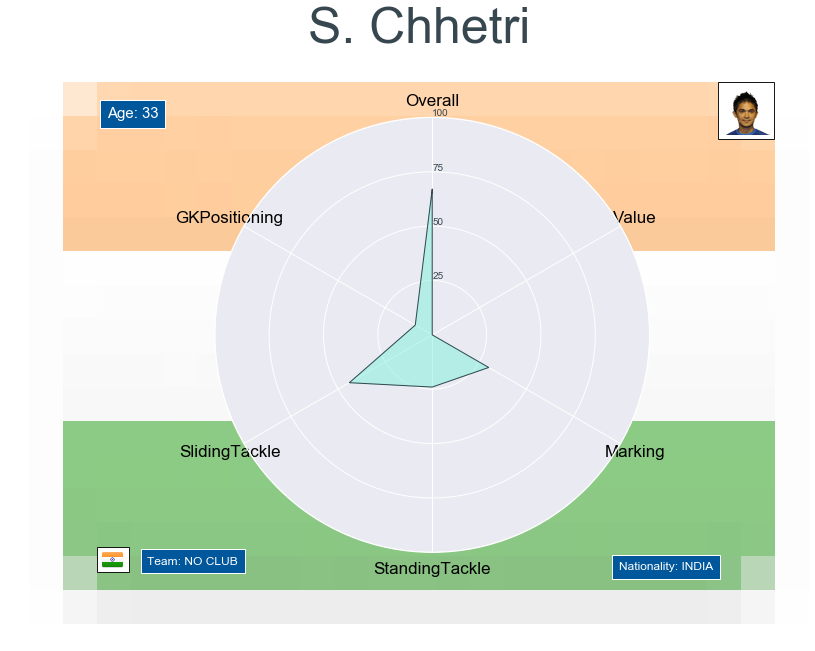

In [106]:
graphPolar(8605)

OSError: cannot identify image file 'img_player.jpg'

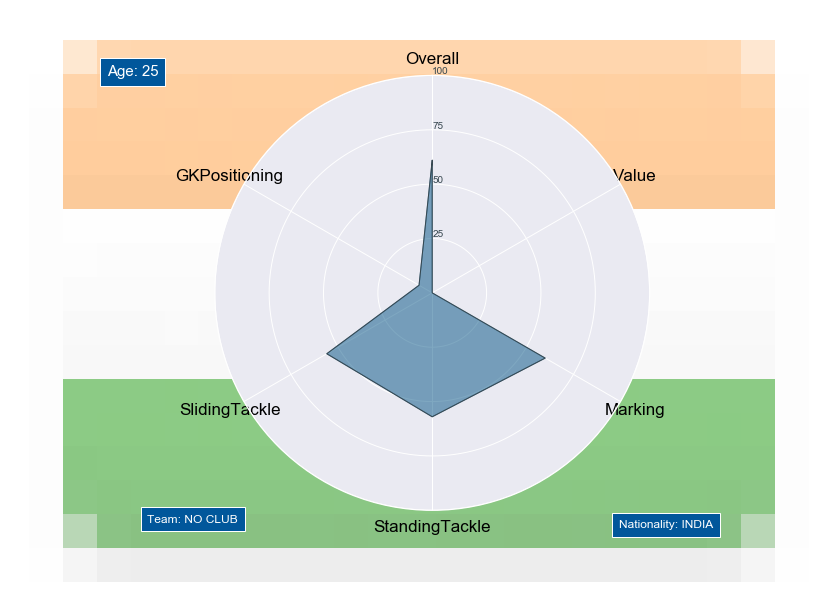

In [107]:
graphPolar(14054)

In [109]:
data[data['Name'] == 'V. Kompany']

ID        Name  Age                                           Photo  \
107  139720  V. Kompany   32  https://cdn.sofifa.org/players/4/19/139720.png   

    Nationality                                Flag  Overall  Potential  \
107     Belgium  https://cdn.sofifa.org/flags/7.png       85         85   

                Club                                    Club_Logo  \
107  Manchester City  https://cdn.sofifa.org/teams/2/light/10.png   

         ...        Composure  Marking  StandingTackle SlidingTackle  \
107      ...             81.0     87.0            85.0          84.0   

     GKDiving  GKHandling  GKKicking GKPositioning GKReflexes Release Clause  
107      10.0         9.0        5.0           8.0        6.0         €40.7M  

[1 rows x 88 columns]

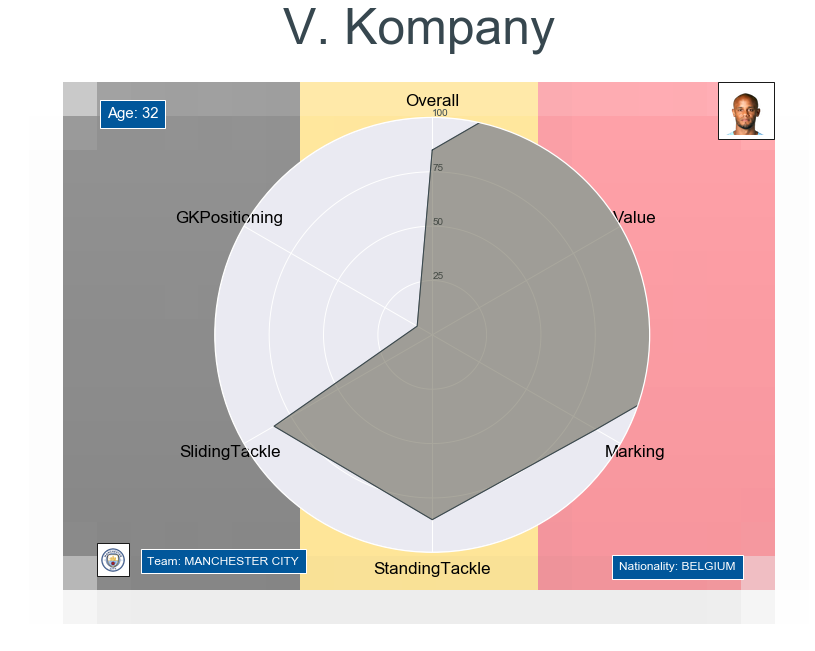

In [110]:
graphPolar(107)